Working With Iris Dataset For analysing KNN model

In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # plying with dataframe
import matplotlib.pyplot as plt
import operator
import seaborn as sns

In [2]:
data=pd.read_csv("iris.csv")
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(data.info())
print(data['Name'].unique())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [4]:
sns.set_style("darkgrid")
sns.FacetGrid(data,hue='Name',height=5)\
    .map(plt.scatter,"SepalLength","SepalWidth")\
    .add_legend()
plt.show()

TypeError: __init__() got an unexpected keyword argument 'height'

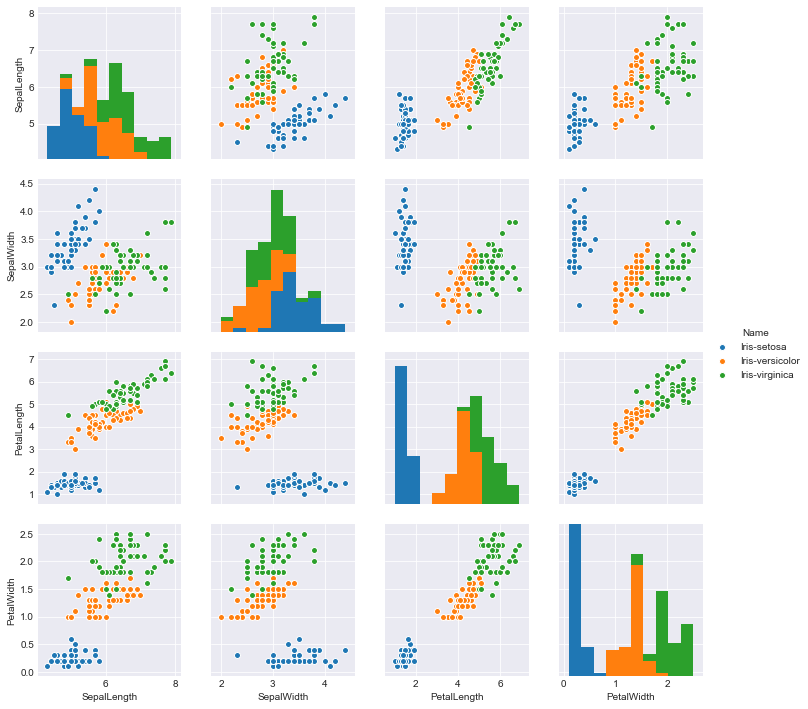

In [5]:
sns.set_style("darkgrid")
sns.pairplot(data,hue="Name",kind="scatter")
plt.show()

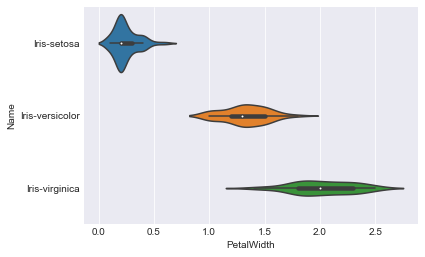

In [6]:
sns.violinplot(y="Name",x="PetalWidth",data=data)
plt.show()

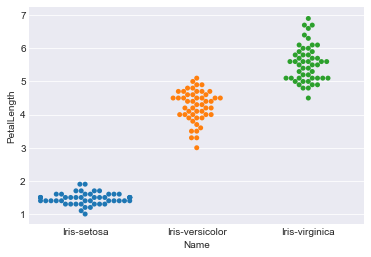

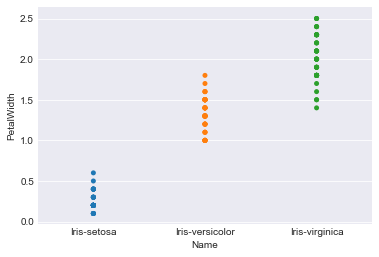

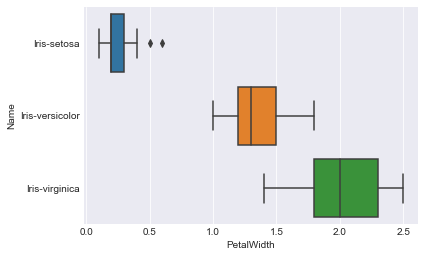

In [7]:
sns.swarmplot(x="Name",y="PetalLength",data=data)
plt.show()
sns.stripplot(x="Name",y="PetalWidth",data=data)
plt.show()
sns.boxplot(y="Name",x="PetalWidth",data=data)
plt.show()

In [8]:
data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


In [34]:
def euclidean(data1,data2,length):
    
    #this function returns the euclidean distance between two rows
    euclidian = 0
    #write your code from here
    for i in range(length):
        euclidian += (data1[i]-data2[i])**2
    return euclidian**0.5  

In [35]:
euclidean([1,2,3],[2,3,4],3)

1.7320508075688772

In [89]:
#defining our KNN model
def KNN(train_set,test_instance,k):
    
    #make your knn model here
    #Hint:
    #step1 - store distances for each row in training set wrt test instance
    #step2 - sort all the rows according to distances in ascending order
    #step3 - take the first K sorted distences and append their id in a list
    #step4 - use this list to count the no. of votes for each category
    #step5 - return the category with highest no. of votes and their corresponding K neighbours id
    train_set = train_set.values
    test_instance = test_instance.values
    distanceWithLabels = []
    for row in train_set:
        data = row[:-1]
        label = row[-1]
        distance = euclidean(data,test_instance[0],4)
        array = [distance,label]
        distanceWithLabels.append(array)
    li = distanceWithLabels    
    li = sorted(li,key=operator.itemgetter(0))
    
    Kli = li[:k]
    
    neigh = []
    for element in Kli:
            neigh.append(element[1])
            
    unique, counts = np.unique(neigh, return_counts=True)
    
    array =  np.asarray((unique, counts)).T

    array = sorted(array,key=operator.itemgetter(1))  
    
    return array[0][0]
        
        
    
    
        

In [100]:
test=[[4,2,3,7]]
testset=pd.DataFrame(test)

In [103]:
result = KNN(data,testset,5)
print(result)

Iris-versicolor


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [105]:
X = data.drop(["Name"],axis=1)
y=data["Name"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

cls = KNeighborsClassifier(n_neighbors=11,weights='distance')
cls.fit(X_train,y_train)
prediction=cls.predict(X_test)




In [106]:
print(metrics.accuracy_score(prediction,y_test))
print(metrics.f1_score(prediction,y_test,average='macro'))
print(metrics.confusion_matrix(prediction,y_test))

0.9777777777777777
0.9761600681140911
[[17  0  0]
 [ 0 14  0]
 [ 0  1 13]]
